# Scraping Google Play Reviews: Running App 🏃‍♂️🏃‍♀️  

## 🎯 **Project Overview**  
Dalam proyek ini, kita akan melakukan **web scraping** untuk mengambil **ulasan pengguna** dari aplikasi **Running App** di Google Play Store. 

## 🔧 **Libraries Used**

In [3]:
from google_play_scraper import reviews_all, Sort
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🏁 **Tahapan Proyek**  

1️⃣  **Scraping Data** → Mengambil ulasan aplikasi menggunakan `google_play_scraper`

In [4]:
# Mengambil ulasan dari play store
running_tracker_reviews = reviews_all(
    'running.tracker.gps.map',
    sleep_milliseconds=0,  # defaults to 0
    lang='en',  # defaults to 'en'
    sort=Sort.NEWEST,  # defaults to Sort.MOST_RELEVANT
)

In [6]:
# Simpan ulasan ke dalam DataFrame
df_running_tracker = pd.DataFrame(np.array(running_tracker_reviews), columns=['content'])
df_running_tracker = df_running_tracker.join(pd.DataFrame(df_running_tracker.pop('content').tolist()))

df_running_tracker

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,aaa7089c-2edc-46de-84d1-ef6434a011f2,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I really like it,5,0,1.7.4,2025-03-12 09:42:30,None,NaT,1.7.4
1,a3f09ed5-3e22-417a-9f95-f80c1fa752ea,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Excellent,5,0,1.7.5,2025-03-12 07:20:52,None,NaT,1.7.5
2,a02fb34e-14a1-4345-8b63-dc3b9ddd1f74,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Good,4,0,1.7.4,2025-03-12 06:48:45,Your praise is the greatest encouragement to u...,2025-03-12 14:16:05,1.7.4
3,958e76aa-ba71-4345-96c3-7578fa43126b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,👍,5,0,1.7.4,2025-03-12 06:35:37,None,NaT,1.7.4
4,0be62035-3d04-4d3d-b2a6-9efd5c48cbab,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,You can't swipe away notifications,1,0,1.7.4,2025-03-12 06:17:30,"Hi, thanks for your feedback. Could you send u...",2025-03-12 14:47:29,1.7.4
...,...,...,...,...,...,...,...,...,...,...,...
28931,4c9cab0f-e4e3-4a0a-911a-0b83869968c5,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Pay to use app. What can poor customer do.,2,84,None,2019-08-06 00:24:42,None,NaT,None
28932,3d06e216-59b9-4a44-903b-71512fe67b60,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,good,5,5,1.0.6,2019-08-05 22:58:20,None,NaT,1.0.6
28933,ff3e4d67-71f2-441c-b491-474109b32b14,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,its not a free app,1,48,None,2019-08-04 23:12:46,None,NaT,None
28934,b74aacb7-59ee-4d17-a5ca-355e2c503e0c,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"love this app, especially the map tracker",5,36,1.0.5,2019-08-04 18:50:33,None,NaT,1.0.5


In [9]:
# Simpan DataFrame ke file CSV
output_path = "../data/1_scrapping_running_tracker.csv"
df_running_tracker.to_csv(output_path, index=False, encoding="utf-8")

2️⃣  **Explore Data** → Mengeksplorasi ulasan aplikasi yang telah diambil

In [7]:
#  Menampilkan ringkasan informasi tentang DataFrame
df_running_tracker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28936 entries, 0 to 28935
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              28936 non-null  object        
 1   userName              28936 non-null  object        
 2   userImage             28936 non-null  object        
 3   content               28936 non-null  object        
 4   score                 28936 non-null  int64         
 5   thumbsUpCount         28936 non-null  int64         
 6   reviewCreatedVersion  26608 non-null  object        
 7   at                    28936 non-null  datetime64[ns]
 8   replyContent          1214 non-null   object        
 9   repliedAt             1214 non-null   datetime64[ns]
 10  appVersion            26608 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 2.4+ MB


Dataset ini terdiri dari **11 kolom** dengan total **28.936 baris**. Berikut adalah penjelasan singkatnya:

Kolom & Tipe Data
- **Teks (`object`)**:  
  - `reviewId`, `userName`, `userImage`, `content`, `reviewCreatedVersion`, `replyContent`, `appVersion`
- **Bilangan Bulat (`int64`)**:  
  - `score`, `thumbsUpCount`
- **Tanggal & Waktu (`datetime64[ns]`)**:  
  - `at`, `repliedAt`

Jumlah Data yang Tidak Kosong (Non-Null Count)
- Semua kolom memiliki **28.936 data**, kecuali:  
- `reviewCreatedVersion` & `appVersion`: **26.608 data** (ada data kosong/missing).  
- `replyContent` & `repliedAt`: **1.214 data** (hanya sedikit review yang mendapatkan balasan).  

In [8]:
# Melihat jumlah rating ulasan App
df_running_tracker['score'].value_counts()

score
5    25019
1     1525
4     1463
3      504
2      425
Name: count, dtype: int64

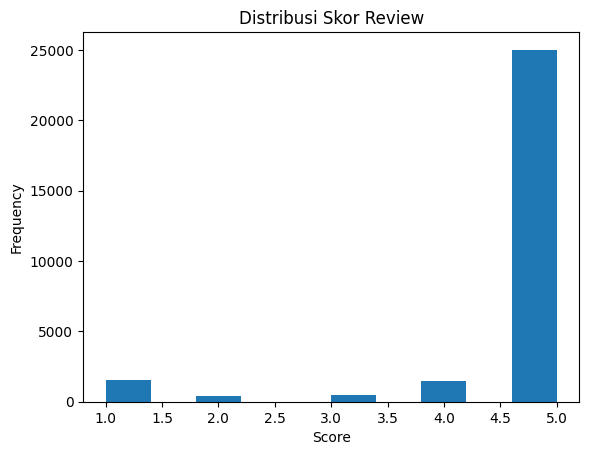

In [14]:
# Menampilkan histogram untuk melihat distribusi skor App
%matplotlib inline 

plt.hist(df_running_tracker['score'])
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribusi Skor Review")
plt.show()


In [16]:
# Rangkuman statistik
df_running_tracker.describe().loc[:, ['score', 'thumbsUpCount']]

,score,thumbsUpCount
count,28936.000000,28936.000000
mean,4.659732,1.154341
min,1.000000,0.000000
25%,5.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,1234.000000
std,0.989904,16.208942


In [32]:
# Melihat jumlah review berdasarkan versi aplikasi

version_release_date = df_running_tracker.groupby('appVersion')['at'].min()
review_count_per_version = df_running_tracker['appVersion'].value_counts()

df_version_info = pd.DataFrame({
    'appVersion': review_count_per_version.index,
    'releaseDate': version_release_date[review_count_per_version.index].values,
    'reviewCount': review_count_per_version.values
})

df_version_info.sort_values(by='reviewCount', ascending=False, inplace=True)
df_version_info.reset_index(drop=True, inplace=True)
df_version_info

,appVersion,releaseDate,reviewCount
0,1.1.9,2020-12-19 08:01:09,3199
1,1.3.7,2022-05-25 02:15:33,2753
2,1.3.0,2022-01-20 05:16:36,2191
3,1.1.3,2020-04-13 23:21:43,2041
4,1.2.7,2021-10-13 09:25:26,1846
5,1.4.4,2023-09-13 17:37:08,1771
6,1.3.9,2023-02-01 03:26:47,1742
7,1.2.1,2021-02-05 07:39:50,1678
8,1.5.5,2024-05-09 20:39:52,1515
9,1.2.5,2021-08-13 14:54:24,1449


Versi aplikasi 1.1.9 yang diluncurkan pada tahun 2020 memiliki review terbanyak

In [29]:
# Melihat panjang review dan statistiknya
df_running_tracker['review_length'] = df_running_tracker['content'].apply(lambda x: len(str(x)))
df_running_tracker['review_length'].describe()

count    28936.000000
mean        31.723113
std         54.964139
min          1.000000
25%          7.000000
50%         13.000000
75%         32.000000
max        792.000000
Name: review_length, dtype: float64

Terdapat 28936 review dengan Mayoritas review cenderung pendek (≤ 13 karakter), Hanya sedikit pengguna yang memberikan review panjang (maksimal 792 karakter).

<Axes: xlabel='at'>

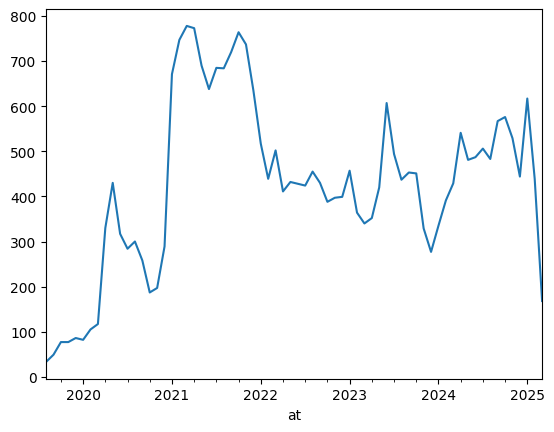

In [24]:
# Grafik jumlah review per bulan.
df_running_tracker['at'] = pd.to_datetime(df_running_tracker['at'])  # Pastikan format datetime
df_running_tracker.set_index('at').resample('ME').count()['reviewId'].plot()


Pada tahun 2021-2022, jumlah review pada aplikasi Running App mengalami lonjakan signifikan. Hal ini menunjukkan adanya peningkatan perhatian dari pengguna.

In [28]:
# Melihat persentase review yang dibalas dari developer

df_running_tracker['replied'] = df_running_tracker['replyContent'].notnull()
df_running_tracker['replied'].value_counts(normalize=True) * 100

replied
False    95.804534
True      4.195466
Name: proportion, dtype: float64

💡 Interpretasi:

* 95.8% review tidak mendapat balasan dari developer.
* Hanya 4.2% review yang sudah dibalas.